# CDC NHANES 2013-2014 EDA

## Overview

The purpose of this notebook is to explore each dataset through clustering, and identifying what the groups being clustered have in common with one another

In [153]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 
from sklearn.preprocessing import StandardScaler
import os
os.environ["OMP_NUM_THREADS"] = '4'
from sklearn.cluster import MiniBatchKMeans,KMeans
from sklearn.decomposition import PCA

### Demographic EDA

In [5]:
# importing clean demographic data
demographic_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/demographic_df_clean_filtered.csv')

In [8]:
demographic_df.head()

,SEQN,sex,age,race_HispOrigin,race_HispOrigin_Asian,native_country,US_Citizen,edu_level,marital_stat,SPinterview_lang,...,household_ref_age,household_ref_edu_level,household_ref_marital_stat,Full_Samp_2yr_INTRWT,Full_Samp_2yr_MECWT,Maskedvar_psuedo_psu,Maskedvar_psuedo_strat,total_household_income,total_family_income,fam_income_poverty_ratio
0,73557,1,69,4,4,1,1.0,3.0,4.0,1,...,69,3.0,4.0,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,1,54,3,3,1,1.0,3.0,1.0,1,...,54,3.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,1,72,3,3,1,1.0,4.0,1.0,1,...,72,4.0,1.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,1,9,3,3,1,1.0,9.0,99.0,1,...,33,3.0,1.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,2,73,3,3,1,1.0,5.0,1.0,1,...,78,5.0,1.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


#### Scaling Data

In [11]:
#Scaling Clean Demographic Data
# 1. Import the scaler
from sklearn.preprocessing import StandardScaler 

# 2. make a scaler
my_standard_scaler = StandardScaler() 

# 3. fit the scaler
my_standard_scaler.fit(demographic_df)

# 4. transform the data. Notice we get back a numpy array even if we put in a dataframe
scaled_demographic_df_data = my_standard_scaler.transform(demographic_df)

scaled_demographic_df = pd.DataFrame(columns=demographic_df.columns, data=scaled_demographic_df_data)
scaled_demographic_df.head()

,SEQN,sex,age,race_HispOrigin,race_HispOrigin_Asian,native_country,US_Citizen,edu_level,marital_stat,SPinterview_lang,...,household_ref_age,household_ref_edu_level,household_ref_marital_stat,Full_Samp_2yr_INTRWT,Full_Samp_2yr_MECWT,Maskedvar_psuedo_psu,Maskedvar_psuedo_strat,total_household_income,total_family_income,fam_income_poverty_ratio
0,-1.731380,-1.015508,1.531807,0.725587,0.449104,-0.139098,-0.269021,-1.003905,-0.838734,-0.345229,...,1.473967,-0.424393,0.014545,-0.642687,-0.655504,-0.966622,0.247365,-0.472803,-0.455780,-0.868931
1,-1.731039,-1.015508,0.916959,-0.066337,-0.172835,-0.139098,-0.269021,-1.003905,-0.901505,-0.345229,...,0.513357,-0.424393,-0.240028,-0.258399,-0.260358,-0.966622,-0.694122,-0.292051,-0.270672,-0.292137
2,-1.730699,-1.015508,1.654776,-0.066337,-0.172835,-0.139098,-0.269021,-0.655272,-0.901505,-0.345229,...,1.666089,0.233101,-0.240028,0.980564,0.916067,-0.966622,-0.458750,-0.111298,-0.085565,1.383022
3,-1.730359,-1.015508,-0.927582,-0.066337,-0.172835,-0.139098,-0.269021,1.087892,1.149040,-0.345229,...,-0.831498,-0.424393,-0.240028,0.906165,0.864771,1.034530,-0.458750,-0.171549,-0.147267,0.161936
4,-1.730019,0.984729,1.695766,-0.066337,-0.172835,-0.139098,-0.269021,-0.306639,-0.901505,-0.345229,...,2.050334,0.890595,-0.240028,1.220536,1.216221,1.034530,1.188851,0.189956,0.222948,1.683692


#### Clustering Demographic Data

In [15]:
Xdemographic= scaled_demographic_df
scaler = StandardScaler()
Xscaled_demographic = scaler.fit(Xdemographic).transform(Xdemographic)

In [27]:
#Clustering with Scaled, clean demographic data 
kmeans = MiniBatchKMeans(n_clusters=3)
kmeans.fit(scaled_demographic_df)
cluster_labels = kmeans.predict(Xscaled_demographic)

C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(


In [29]:
# reduce to 2d for visualization
pca = PCA(n_components=2)
pca.fit(Xscaled_demographic)
in2d = pca.transform(Xscaled_demographic)

Text(0.5, 1.0, 'Clustering Demographic Features')

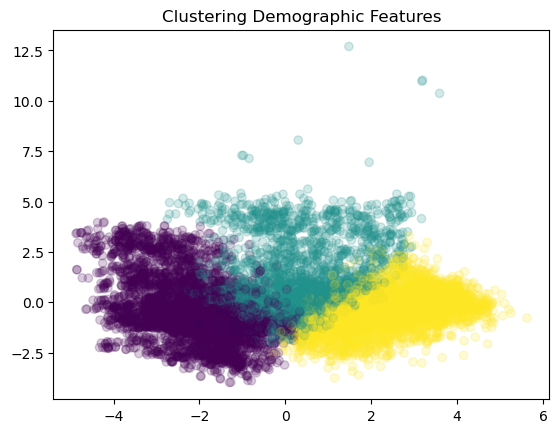

In [31]:
plt.figure()
plt.scatter(in2d[:,0],in2d[:,1],c=cluster_labels, alpha =.2)
plt.title('Clustering Demographic Features')

In [92]:
pd.DataFrame(Xscaled,columns=Xdemographic.columns).groupby(cluster_labels).mean().T

,0,1,2
SEQN,-0.012351,0.000078,0.003065
sex,0.030634,-0.021291,0.012504
age,-0.039300,-0.815235,0.786900
race_HispOrigin,-1.395087,0.160755,0.201378
race_HispOrigin_Asian,-1.207565,0.164777,0.149885
native_country,0.401001,-0.093823,-0.012506
US_Citizen,0.995934,-0.160717,-0.099966
edu_level,-0.252339,0.847626,-0.743646
marital_stat,0.013815,0.896546,-0.857911
SPinterview_lang,2.629817,-0.342934,-0.341584


In [141]:
# saving cluster labels in dataframe, can be used to sort as well
demographicdf_clusterlabels = pd.DataFrame(Xscaled_demographic,columns=Xdemographic.columns).groupby(cluster_labels).mean()

#### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression()
lr.fit(Xdemographic,cluster_labels)
lr.score(Xdemographic,cluster_labels)

C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9978599816569856

In [41]:
lr.coef_

array([[ 0.18077298,  0.03097235, -2.95864058, -0.84188043,  0.40418602,
        -0.63830117, -0.08657029,  3.04402932,  4.22728194,  0.80965894,
        -0.25534607,  1.3688733 ,  1.05028884,  1.26342067,  1.7759374 ,
        -1.02553939,  0.44014474, -0.97976855, -0.41651847,  0.57187359,
        -1.1777829 , -1.30962785,  0.17428244, -0.15882051, -0.13726071,
        -0.19569467, -0.43323088],
       [-0.19123436,  0.3183884 ,  0.68489627, -1.18787669, -1.74334284,
         1.20156924,  1.26889258, -2.3378917 , -1.7885685 ,  1.23079567,
        -0.17819065,  1.71277878,  1.79886455,  0.67996321,  0.51253773,
        -0.58892491,  0.35696673, -1.00946329, -1.64783214, -0.09556709,
        -0.72875376, -0.85838016, -0.11872074,  0.41089061, -0.66396289,
        -0.4002878 , -2.22552554],
       [ 0.01046139, -0.34936075,  2.2737443 ,  2.02975712,  1.33915683,
        -0.56326807, -1.18232228, -0.70613762, -2.43871344, -2.04045461,
         0.43353673, -3.08165208, -2.84915339, -1.9433

In [ ]:
# viewing summary


In [107]:
# Saving clusters 
Xdemographic["cluster_lab"]=cluster_labels
#Xquest.to_csv("Xdemographic_save.csv")

### Questionnaire EDA

In [45]:
quest_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/quest_df_clean_filtered.csv')

In [47]:
quest_df.head()

,SEQN,high_bp,high_col,have_diabetes,diabetes_risk,taking_insulin,smoked_greater_100cigs,drink_greater_12,vig_work_activity,mod_work_activity,...,chd,angina,angina_age_first_present,stroke,closerel_heartattack,losing_wt,increasing_exc,reducing_salt_dt,reducing_fat_dt,insured
0,73557,1.0,1.0,1.0,9.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1
1,73558,1.0,1.0,1.0,9.0,1.0,1.0,1.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2
2,73559,1.0,1.0,1.0,9.0,1.0,1.0,1.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1
3,73560,9.0,9.0,2.0,9.0,2.0,9.0,9.0,9.0,9.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1
4,73561,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1


#### Scaling Data

In [50]:
##Scaling Clean Questionnaire Data

# 1. Import the scaler
from sklearn.preprocessing import StandardScaler 

# 2. make a scaler
my_standard_scaler = StandardScaler() 

# 3. fit the scaler
my_standard_scaler.fit(quest_df)

# 4. transform the data. Notice we get back a numpy array even if we put in a dataframe
scaled_quest_df_data = my_standard_scaler.transform(quest_df)

scaled_quest_df = pd.DataFrame(columns=quest_df.columns, data=scaled_quest_df_data)
scaled_quest_df.head()

,SEQN,high_bp,high_col,have_diabetes,diabetes_risk,taking_insulin,smoked_greater_100cigs,drink_greater_12,vig_work_activity,mod_work_activity,...,chd,angina,angina_age_first_present,stroke,closerel_heartattack,losing_wt,increasing_exc,reducing_salt_dt,reducing_fat_dt,insured
0,-1.731380,-0.935489,-0.946602,-0.863300,1.318217,-0.908032,-0.964867,-0.976036,-0.588819,-0.541175,...,-0.860125,-0.863404,-0.857905,-1.146604,-0.861879,-0.855687,-0.587025,-0.887477,-0.601682,-0.370137
1,-1.731039,-0.935489,-0.946602,-0.863300,1.318217,-0.908032,-0.964867,-0.976036,-0.588819,-0.839386,...,-0.860125,-0.863404,-0.857905,-0.859785,-0.861879,-0.583653,-0.587025,-0.611471,-0.601682,1.922888
2,-1.730699,-0.935489,-0.946602,-0.863300,1.318217,-0.908032,-0.964867,-0.976036,-0.588819,-0.839386,...,-0.860125,-0.863404,-0.857905,-0.859785,-1.144289,-0.583653,-0.587025,-0.611471,-0.601682,-0.370137
3,-1.730359,1.320097,1.311368,-0.160499,1.318217,-0.187175,1.226856,1.104803,1.550758,1.546305,...,1.145198,1.147994,1.148302,1.147949,1.114992,1.320580,1.321320,1.320570,1.320113,-0.370137
4,-1.730019,-0.935489,-0.664356,-0.160499,-0.714232,-0.187175,-0.690902,-0.976036,-0.588819,-0.839386,...,-0.860125,-0.863404,-0.857905,-0.859785,-1.144289,-0.855687,-0.587025,-0.611471,-0.601682,-0.370137


In [52]:
Xquest = scaled_quest_df
scaler = StandardScaler()
Xscaled_quest = scaler.fit(Xquest).transform(Xquest)

In [54]:
#Clustering with Scaled, clean questionnaire data

kmeans = MiniBatchKMeans(n_clusters=3)
kmeans.fit(scaled_quest_df)
cluster_labels = kmeans.predict(Xscaled_quest)

C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(


In [56]:
# reduce to 2d for visualization
pca = PCA(n_components=2)
pca.fit(Xscaled_quest)
in2d = pca.transform(Xscaled_quest)

Text(0.5, 1.0, 'Clustering Questionnaire Features')

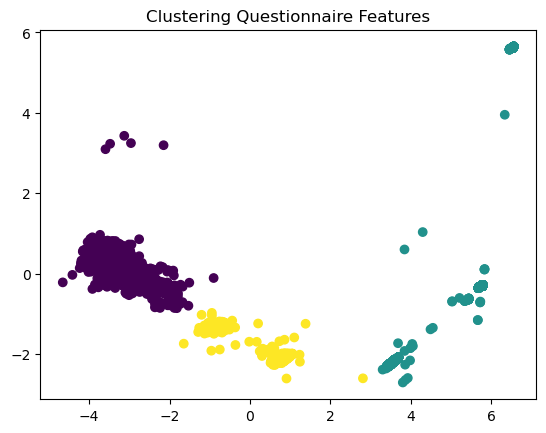

In [58]:
plt.figure()
plt.scatter(in2d[:,0],in2d[:,1],c=cluster_labels)
plt.title('Clustering Questionnaire Features')

In [60]:
QuestDfclusterlabels = pd.DataFrame(Xscaled_quest,columns=Xquest.columns).groupby(cluster_labels).mean()

In [137]:
QuestDfclusterlabels.T

,0,1,2
SEQN,0.006977,-0.017663,0.034746
high_bp,-0.757568,1.320097,-0.659751
high_col,-0.751061,1.311368,-0.667671
have_diabetes,-0.225294,0.385926,-0.161531
diabetes_risk,-0.488595,0.908567,-0.723185
taking_insulin,-0.211952,0.370646,-0.191409
smoked_greater_100cigs,-0.809934,1.226856,0.255304
drink_greater_12,-0.725896,1.104803,0.201502
vig_work_activity,-0.643373,1.134600,-0.630560
mod_work_activity,-0.637215,1.126488,-0.638827


#### Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

In [65]:
lr = LogisticRegression()
lr.fit(Xquest,cluster_labels)
lr.score(Xquest,cluster_labels)

1.0

In [69]:
lr.coef_

array([[ 3.87055008e-05, -1.18434735e-01, -1.20964993e-01,
         5.25206748e-02, -9.74572896e-02, -1.28262381e-02,
        -2.33902658e-01, -1.38810663e-01, -2.13945521e-02,
        -2.08923262e-02, -3.37963261e-03, -2.94781463e-02,
        -1.56312159e-01, -1.51974010e-01, -8.16531371e-01,
        -7.95213805e-01, -8.54767269e-01, -7.06000035e-01,
        -7.31651156e-01, -6.98905509e-01, -1.11787076e-01,
        -8.19198992e-02, -1.00237143e-01, -9.62376777e-02,
         8.05745121e-02],
       [-5.59320387e-02,  6.51319109e-01,  6.38020462e-01,
         1.41086154e-02,  2.05638505e-01,  1.00970996e-02,
         2.28864742e-01,  1.74353863e-01,  2.47982405e-01,
         2.28006208e-01,  2.47831567e-01,  2.53150333e-01,
         1.73743062e-01,  1.74392145e-01,  8.30539739e-02,
         8.23260728e-02,  8.39119439e-02,  9.02344691e-02,
         9.15179582e-02,  7.23531929e-02,  6.99539978e-01,
         7.09833879e-01,  6.90851309e-01,  6.96587515e-01,
        -3.01728017e-01],
    

In [ ]:
# saving cluster_labels from Questionnaire df
Xquest["cluster_lab"]=cluster_labels
Xquest.to_csv("Xquest_save.csv")

### Labs EDA

In [71]:
labs_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/labs_df_clean_filtered.csv')

In [73]:
labs_df.head()

,SEQN,total_calcium_lab,chol_lab,creatinine,sodium_lab,total_protein_lab,trigly_refridg,wbc_cnt,rbc_cnt,hemoglobin,hemoglobin_mean,hemoglobin_conc,platelet_cnt,HbA1c_percent,total_chol_lab
0,73557,9.5,168.0,1.21,136.0,6.5,140.0,4.7,5.09,15.2,29.9,33.4,204.0,13.9,167.0
1,73558,9.2,167.0,0.79,128.0,7.8,257.0,12.6,3.84,11.9,31.0,32.5,314.0,9.1,170.0
2,73559,8.9,127.0,1.22,142.0,5.9,51.0,7.2,5.53,17.2,31.1,34.3,237.0,8.9,126.0
3,73560,9.5,181.0,0.82,140.0,7.1,111.0,7.8,4.61,12.9,28.0,34.0,240.0,5.4,168.0
4,73561,10.0,207.0,0.73,142.0,7.1,88.0,6.6,4.72,14.5,30.6,33.0,300.0,4.9,201.0


#### Scaling Data

In [78]:
# 2. make a scaler
my_standard_scaler = StandardScaler() 

# 3. fit the scaler
my_standard_scaler.fit(labs_df)

# 4. transform the data. Notice we get back a numpy array even if we put in a dataframe
scaled_labsdf_data = my_standard_scaler.transform(labs_df)

scaled_labsdf = pd.DataFrame(columns=labs_df.columns, data=scaled_labsdf_data)
scaled_labsdf.head()

,SEQN,total_calcium_lab,chol_lab,creatinine,sodium_lab,total_protein_lab,trigly_refridg,wbc_cnt,rbc_cnt,hemoglobin,hemoglobin_mean,hemoglobin_conc,platelet_cnt,HbA1c_percent,total_chol_lab
0,-1.731380,0.030153,-0.446780,0.876385,-2.124708,-1.583232,0.068396,-1.229208,0.999966,1.100103,0.179124,-0.423043,-0.750089,9.989592,-0.318788
1,-1.731039,-0.970607,-0.475905,-0.175825,-6.534206,1.817142,1.123052,2.444426,-1.887200,-1.276418,0.639958,-1.354831,1.033341,4.237289,-0.235790
2,-1.730699,-1.971368,-1.640877,0.901438,1.182416,-3.152635,-0.733864,-0.066665,2.016249,2.540419,0.681852,0.508745,-0.215060,3.997610,-1.453100
3,-1.730359,0.030153,-0.068164,-0.100668,0.080041,-0.013829,-0.193015,0.212345,-0.108705,-0.556260,-0.616862,0.198149,-0.166421,-0.196777,-0.291122
4,-1.730019,1.698087,0.689068,-0.326141,1.182416,-0.013829,-0.400341,-0.345675,0.145365,0.595992,0.472382,-0.837171,0.806359,-0.795976,0.621861


In [80]:
Xlabs = scaled_labsdf
scaler = StandardScaler()
Xscaled_labs = scaler.fit(Xlabs).transform(Xlabs)

#### Clustering

In [82]:
#Clustering with Scaled, clean demographic data 
kmeans = MiniBatchKMeans(n_clusters=3)
kmeans.fit(scaled_labsdf_data)
cluster_labels = kmeans.predict(Xscaled_labs)

C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


In [88]:
# reduce to 2d for visualization
pca = PCA(n_components=2)
pca.fit(Xscaled_labs)
in2d = pca.transform(Xscaled_labs)

Text(0.5, 1.0, 'Clustering Lab Features')

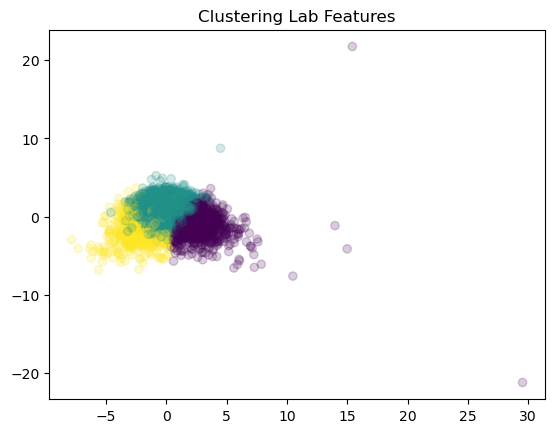

In [92]:
plt.figure()
plt.scatter(in2d[:,0],in2d[:,1],c=cluster_labels, alpha =.2)
plt.title('Clustering Lab Features')

In [94]:
# saving cluster labels in dataframe
labsdf_clusterlabels = pd.DataFrame(Xscaled_quest,columns=Xquest.columns).groupby(cluster_labels).mean()

In [147]:
labsdf_clusterlabels.T

,0,1,2
SEQN,-0.051304,0.490912,-0.534518
high_bp,-0.729043,0.037609,0.303837
high_col,-0.750057,0.039939,0.311176
have_diabetes,-0.221527,0.086649,0.006683
diabetes_risk,-0.497405,-0.064375,0.309805
taking_insulin,-0.213020,0.082514,0.007345
smoked_greater_100cigs,-0.769331,0.061061,0.296293
drink_greater_12,-0.717388,0.054099,0.279521
vig_work_activity,-0.644984,-0.035224,0.346788
mod_work_activity,-0.634063,-0.036713,0.343291


#### Logistic Regression

In [99]:
lr = LogisticRegression()
lr.fit(Xlabs,cluster_labels)
lr.score(Xlabs,cluster_labels)

0.9945990013247733

In [101]:
lr.coef_

array([[ 0.12777495,  1.54797313,  7.961677  ,  0.80295506, -0.39805037,
         1.41149407,  4.20447866,  0.16850969,  1.08355708,  4.35603253,
         2.76757405,  1.69059589, -1.23228392,  1.88597892,  7.34602422],
       [ 4.56417062,  0.05557103, -4.66606731, -0.32420325,  0.7813662 ,
        -0.44988603, -1.80444938,  0.13534303,  1.67298926,  1.50607079,
         0.588445  ,  1.00928971, -1.22796309, -1.14061145, -4.19025311],
       [-4.69194557, -1.60354416, -3.29560969, -0.47875181, -0.38331584,
        -0.96160804, -2.40002927, -0.30385272, -2.75654634, -5.86210332,
        -3.35601905, -2.6998856 ,  2.46024701, -0.74536747, -3.15577111]])

In [103]:
# saving cluster_labels from labs df
Xlabs["cluster_lab"]=cluster_labels
Xlabs.to_csv("Xlabs_clusterlabels.csv")

### Diet EDA

In [113]:
diet_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/diet_df_clean_filtered.csv')

In [115]:
diet_df.head()

,SEQN,energy_kcal,protein_gm,carb_gm,tot_sugar_gm,tot_fat_gm,tot_sat_fattyacids_gm,tot_monounsat_fattyacids_gm,tot_polyunsat_fattyacids_gm,chol_mg_diet,...,potassium_mg_diet,calcium_mg_diet,iron_mg_diet,vit_b12_mcg,vit_c_mg,vit_d_mcg,vit_k_mcg,alcohol_gm,caffeine_mg,on_special_diet
0,73557,1574.0,43.63,239.59,176.47,52.81,17.819,18.493,8.829,209.0,...,2228.0,949.0,8.41,2.79,241.4,3.3,29.2,0.0,203.0,2.0
1,73558,5062.0,338.13,423.78,44.99,124.29,53.408,35.481,20.505,2584.0,...,4930.0,3193.0,26.88,21.45,2.3,15.2,23.4,119.0,240.0,2.0
2,73559,1743.0,64.61,224.39,102.90,65.97,25.263,20.902,12.953,88.0,...,1694.0,877.0,17.57,3.78,195.1,4.0,40.4,0.0,45.0,1.0
3,73560,1490.0,77.75,162.92,80.58,58.27,23.511,16.986,9.617,187.0,...,2088.0,1521.0,14.19,8.76,93.0,9.9,31.5,0.0,0.0,2.0
4,73561,1421.0,55.24,178.20,87.78,55.36,4.479,26.216,1.263,41.0,...,1445.0,1410.0,17.72,8.30,236.5,23.5,126.0,0.0,24.0,1.0


#### Scaling Data

In [118]:
# 2. make a scaler
my_standard_scaler = StandardScaler() 

# 3. fit the scaler
my_standard_scaler.fit(diet_df)

# 4. transform the data. Notice we get back a numpy array even if we put in a dataframe
scaled_dietdf_data = my_standard_scaler.transform(diet_df)

scaled_dietdf = pd.DataFrame(columns=diet_df.columns, data=scaled_dietdf_data)
scaled_dietdf.head()

,SEQN,energy_kcal,protein_gm,carb_gm,tot_sugar_gm,tot_fat_gm,tot_sat_fattyacids_gm,tot_monounsat_fattyacids_gm,tot_polyunsat_fattyacids_gm,chol_mg_diet,...,potassium_mg_diet,calcium_mg_diet,iron_mg_diet,vit_b12_mcg,vit_c_mg,vit_d_mcg,vit_k_mcg,alcohol_gm,caffeine_mg,on_special_diet
0,-1.731380,-0.400421,-0.712954,-0.005251,1.008695,-0.496824,-0.436297,-0.437157,-0.696095,-0.202287,...,-0.093440,0.055407,-0.676257,-0.388079,2.082203,-0.295421,-0.455744,-0.250901,0.799465,-0.295019
1,-1.731039,3.392209,6.333324,1.585952,-0.908680,1.183853,1.959176,0.642403,0.297519,10.641174,...,2.289215,4.208297,1.635235,3.829011,-0.924780,2.000876,-0.497882,5.385905,1.048900,-0.295019
2,-1.730699,-0.216662,-0.210981,-0.136562,-0.064178,-0.187399,0.064754,-0.284069,-0.345147,-0.754733,...,-0.564327,-0.077841,0.470103,-0.164342,1.499923,-0.160345,-0.374375,-0.250901,-0.265688,-0.740476
3,-1.730359,-0.491758,0.103410,-0.667597,-0.389671,-0.368445,-0.053172,-0.532924,-0.629037,-0.302732,...,-0.216893,1.113987,0.047101,0.961119,0.215886,0.978155,-0.439035,-0.250901,-0.569055,-0.295019
4,-1.730019,-0.566784,-0.435170,-0.535594,-0.284673,-0.436867,-1.334204,0.053627,-1.339952,-0.969319,...,-0.783898,0.908563,0.488875,0.857161,2.020580,3.602495,0.247517,-0.250901,-0.407259,-0.740476


In [120]:
Xdiet = scaled_dietdf
scaler = StandardScaler()
Xscaled_diet = scaler.fit(Xdiet).transform(Xdiet)

#### Clustering

In [125]:
#Clustering with Scaled, clean demographic data 
kmeans = MiniBatchKMeans(n_clusters=3)
kmeans.fit(scaled_dietdf_data)
cluster_labels = kmeans.predict(Xscaled_diet)

C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


In [129]:
# reduce to 2d for visualization
pca = PCA(n_components=2)
pca.fit(Xscaled_diet)
in2d = pca.transform(Xscaled_diet)

Text(0.5, 1.0, 'Clustering Diet Features')

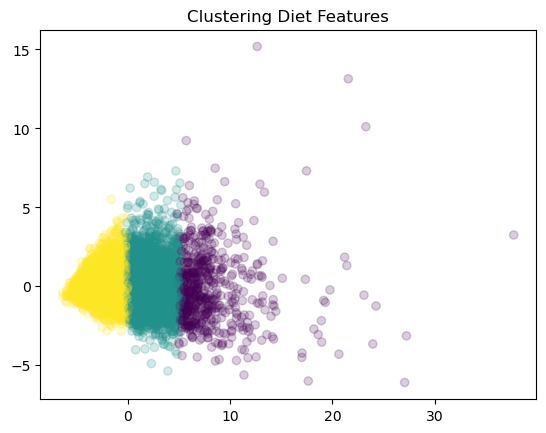

In [131]:
plt.figure()
plt.scatter(in2d[:,0],in2d[:,1],c=cluster_labels, alpha =.2)
plt.title('Clustering Diet Features')

In [133]:
# saving diet cluster labels in dataframe
dietdf_clusterlabels = pd.DataFrame(Xscaled_diet,columns=Xdiet.columns).groupby(cluster_labels).mean()

In [149]:
dietdf_clusterlabels.T

,0,1,2
SEQN,0.036379,-0.001999,-0.002523
energy_kcal,2.560176,0.555283,-0.551771
protein_gm,2.199837,0.488214,-0.480071
carb_gm,2.140084,0.502258,-0.481713
tot_sugar_gm,1.610178,0.366260,-0.356181
tot_fat_gm,2.454100,0.514280,-0.519233
tot_sat_fattyacids_gm,2.283866,0.489470,-0.489057
tot_monounsat_fattyacids_gm,2.365160,0.485311,-0.494860
tot_polyunsat_fattyacids_gm,2.045454,0.442169,-0.440045
chol_mg_diet,1.668828,0.390639,-0.375089


#### Logistic Regression

In [160]:
lr_diet = LogisticRegression()
lr_diet.fit(Xdiet,cluster_labels)
lr_diet.score(Xdiet,cluster_labels)

C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9984714154692754

In [162]:
lr_diet.coef_

array([[-0.01629445,  2.73727918,  2.35385686,  2.27712836,  1.92537251,
         2.68978878,  2.19678169,  2.67657943,  2.07067384,  1.75462059,
         1.79993368,  2.3834438 ,  2.36229262,  1.80197334,  1.98292048,
         1.56330716,  0.93526351,  1.08310982,  0.8092427 ,  0.6733049 ,
         0.81542826, -0.15413202],
       [-0.04851259,  0.63015152,  0.46706634,  0.70438343,  0.43411891,
         0.25879864,  0.75600039,  0.61741463,  0.72097551,  0.54214271,
         0.67939836,  0.65448502,  0.66622897,  0.50718504,  0.58428768,
         0.30328311,  0.42734621,  0.23900442,  0.32828935,  0.12305968,
         0.32414846, -0.7519697 ],
       [ 0.06480704, -3.3674307 , -2.82092319, -2.98151179, -2.35949142,
        -2.94858743, -2.95278208, -3.29399407, -2.79164935, -2.2967633 ,
        -2.47933204, -3.03792882, -3.02852159, -2.30915838, -2.56720815,
        -1.86659027, -1.36260971, -1.32211424, -1.13753204, -0.79636457,
        -1.13957672,  0.90610172]])

In [164]:
# saving cluster_labels from labs df
Xdiet["cluster_lab"]=cluster_labels
#Xdiet.to_csv("Xlabs_clusterlabels.csv")

### Examination EDA

In [171]:
exam_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/exam_df_clean_filtered.csv')

In [173]:
exam_df.head()

,SEQN,puls_reg_nonreg,bpsy_r1,bpsy_r2,bpsy_r3,bpdi_r1,bpdi_r2,bpdi_r3,weight_kg,height_cm,bmi,waist_circum_cm,arm_circum_cm,leg_len_cm
0,73557,1.0,122.0,114.0,102.0,72.0,76.0,74.0,78.3,171.3,26.7,100.0,35.3,39.2
1,73558,1.0,156.0,160.0,156.0,62.0,80.0,42.0,89.5,176.8,28.6,107.6,34.7,40.0
2,73559,1.0,140.0,140.0,146.0,90.0,76.0,80.0,88.9,175.3,28.9,109.2,33.5,40.0
3,73560,1.0,108.0,102.0,104.0,38.0,34.0,38.0,32.2,137.3,17.1,61.0,21.0,33.5
4,73561,1.0,136.0,134.0,142.0,86.0,88.0,86.0,52.0,162.4,19.7,87.8,25.2,36.3


#### Scaling Data

In [175]:
# 2. make a scaler
my_standard_scaler = StandardScaler() 

# 3. fit the scaler
my_standard_scaler.fit(exam_df)

# 4. transform the data. Notice we get back a numpy array even if we put in a dataframe
scaled_examdf_data = my_standard_scaler.transform(exam_df)

scaled_examdf = pd.DataFrame(columns=exam_df.columns, data=scaled_examdf_data)
scaled_examdf.head()

,SEQN,puls_reg_nonreg,bpsy_r1,bpsy_r2,bpsy_r3,bpdi_r1,bpdi_r2,bpdi_r3,weight_kg,height_cm,bmi,waist_circum_cm,arm_circum_cm,leg_len_cm
0,-1.731380,-0.115869,0.287286,-0.232787,-0.950483,0.482300,0.775022,0.581731,0.487104,0.669393,0.143520,0.598084,0.873417,0.175464
1,-1.731039,-0.115869,2.483279,2.673821,2.466868,-0.299621,1.068164,-1.678009,0.835121,0.915637,0.392024,0.956955,0.796029,0.403038
2,-1.730699,-0.115869,1.449871,1.410078,1.834025,1.889756,0.775022,1.005432,0.816477,0.848479,0.431261,1.032506,0.641254,0.403038
3,-1.730359,-0.115869,-0.616946,-0.991033,-0.823914,-2.176229,-2.302975,-1.960477,-0.945356,-0.852842,-1.112078,-1.243487,-0.970989,-1.446002
4,-1.730019,-0.115869,1.191519,1.030955,1.580888,1.576988,1.654450,1.429134,-0.330113,0.270925,-0.772020,0.022003,-0.429275,-0.649493


In [177]:
Xexam = scaled_examdf
scaler = StandardScaler()
Xscaled_exam = scaler.fit(Xexam).transform(Xexam)

#### Clustering

In [179]:
#Clustering with Scaled, clean demographic data 
kmeans = MiniBatchKMeans(n_clusters=3)
kmeans.fit(scaled_examdf_data)
cluster_labels = kmeans.predict(Xscaled_exam)

C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


In [181]:
# reduce to 2d for visualization
pca = PCA(n_components=2)
pca.fit(Xscaled_exam)
in2d = pca.transform(Xscaled_exam)

Text(0.5, 1.0, 'Clustering Examination Features')

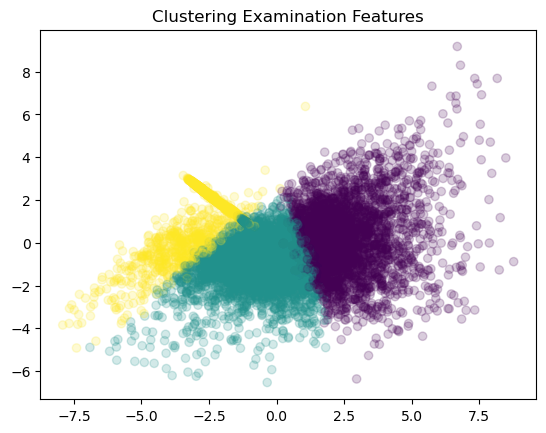

In [183]:
plt.figure()
plt.scatter(in2d[:,0],in2d[:,1],c=cluster_labels, alpha =.2)
plt.title('Clustering Examination Features')

In [185]:
# saving diet cluster labels in dataframe
examdf_clusterlabels = pd.DataFrame(Xscaled_exam,columns=Xexam.columns).groupby(cluster_labels).mean()

In [187]:
examdf_clusterlabels.T

,0,1,2
SEQN,-0.016723,0.022640,-0.027240
puls_reg_nonreg,0.133638,-0.057921,-0.083798
bpsy_r1,0.879573,-0.442301,-0.401833
bpsy_r2,0.919080,-0.463362,-0.416953
bpsy_r3,0.931091,-0.452567,-0.463701
bpdi_r1,0.691733,-0.345075,-0.322804
bpdi_r2,0.660446,-0.336432,-0.291132
bpdi_r3,0.604504,-0.324139,-0.226756
weight_kg,0.865655,-0.107072,-1.199974
height_cm,0.536727,0.325142,-1.703657


#### Logistic Regression

In [189]:
lr_exam = LogisticRegression()
lr_exam.fit(Xexam,cluster_labels)
lr_exam.score(Xexam,cluster_labels)

0.9973504534800774

In [191]:
lr_exam.coef_

array([[-0.03655206,  0.58613375,  3.3006889 ,  3.38405274,  3.62033282,
         2.63622392,  2.4640844 ,  2.25905821,  3.67838539,  2.67649106,
         3.51560911,  4.18862587,  3.36989363,  1.27281011],
       [ 0.05632297, -0.23575482, -1.89634832, -1.92541694, -1.65944501,
        -1.36509477, -1.35009914, -1.43998105, -0.47040448,  2.45989683,
         0.4366933 ,  0.55585665,  0.12574726,  0.62064854],
       [-0.01977092, -0.35037892, -1.40434058, -1.4586358 , -1.96088781,
        -1.27112915, -1.11398525, -0.81907716, -3.20798091, -5.13638789,
        -3.95230241, -4.74448253, -3.49564089, -1.89345865]])

In [ ]:
# saving cluster_labels from labs df
Xexam["cluster_lab"]=cluster_labels
#Xexam.to_csv("Xexam_clusterlabels.csv")

### Medications EDA

In [195]:
meds_df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/medic_df_clean_filtered.csv')

In [197]:
meds_df.head()

,SEQN,rx_use,drug_name,RXQSEEN,rx_days,rx_amt
0,73557,1,99999,1.0,1095.0,2.0
1,73557,1,INSULIN,2.0,1460.0,2.0
2,73558,1,GABAPENTIN,1.0,243.0,4.0
3,73558,1,INSULIN GLARGINE,1.0,365.0,4.0
4,73558,1,OLMESARTAN,1.0,14.0,4.0


<AxesSubplot:title={'center':'Top 20 Medications'}>

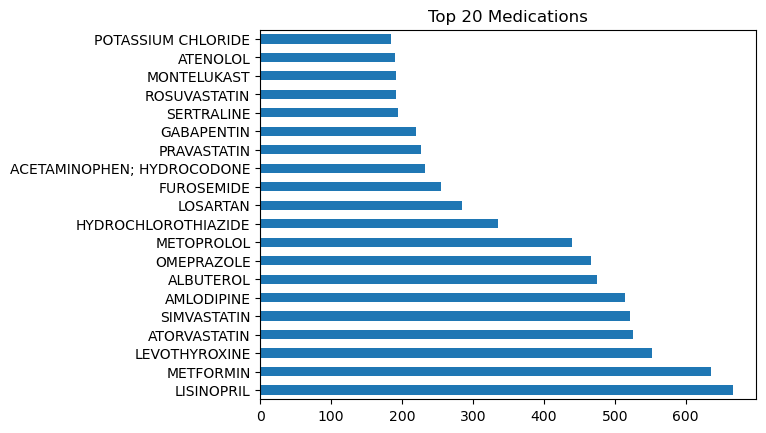

In [213]:
meds_df['drug_name'].value_counts().head(20).plot(kind='barh',title='Top 20 Medications')
